In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
data_raw = pd.read_csv("/content/drive/MyDrive/school/CNU_2022_data/data/학생건강검사 결과분석 rawdata_서울_2015_20200114.csv", 
                         encoding = 'cp949')
data_raw.head()

,ID,최종가중치,학교ID,도시규모,도시규모별분석용,학년도,광역시도,시도별,학교급별,학교명,...,키,몸무게,혈당식전mgdl,총콜레스테롤mgdl,ASTUL,ALTUL,혈색소gdl,간염검사,수축기,이완기
0,Aa011남10101,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,125.8,27.3,NaN,NaN,NaN,NaN,NaN,NaN,77.0,58.0
1,Aa011남10102,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,124.3,25.4,NaN,NaN,NaN,NaN,NaN,NaN,83.0,51.0
2,Aa011남10103,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,119.2,23.5,NaN,NaN,NaN,NaN,NaN,NaN,103.0,65.0
3,Aa011남10104,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,115.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,92.0,66.0
4,Aa011남10105,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,120.0,33.5,NaN,NaN,NaN,NaN,NaN,NaN,102.0,59.0


In [3]:
data = data_raw[['키', '몸무게']]
data.dropna(inplace = True)
data.reset_index(drop = True, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [4]:
np.random.seed(12)

n = 300
select = np.random.randint(1, data.shape[0], n)
height_data = data['키'][select]
weight_data = data['몸무게'][select]




In [5]:
def height_pred(x, a, b):
  y = a*x + b
  return(y)

In [6]:
a_range = np.linspace(0.7, 1.3, 31)
b_range = np.linspace(80, 120, 41)

a_list = []
b_list = []
rmse_list = []

df = pd.concat([weight_data, height_data], axis = 1)

for a in a_range:
  for b in b_range:
    df["예상 키"] = height_pred(df['몸무게'], a, b)
    diff = df['키'] - df['예상 키']
    RMSE = np.sqrt(sum(diff**2)/len(diff))

    a_list.append(a)
    b_list.append(b)
    rmse_list.append(RMSE)


data_rmse = pd.DataFrame([a_list, b_list, rmse_list]).T
data_rmse.columns = ['a', 'b', 'RMSE']
data_rmse

,a,b,RMSE
0,0.7,80.0,40.751342
1,0.7,81.0,39.779345
2,0.7,82.0,38.808772
3,0.7,83.0,37.839731
4,0.7,84.0,36.872343
...,...,...,...
1266,1.3,116.0,28.833483
1267,1.3,117.0,29.747514
1268,1.3,118.0,30.666911
1269,1.3,119.0,31.591206


In [7]:
data_min = data_rmse[data_rmse['RMSE'] == data_rmse.min()[2]]
data_min

,a,b,RMSE
360,0.86,112.0,9.119193


In [8]:
a = float(data_min['a'])
b = float(data_min['b'])
RMSE = float(data_min["RMSE"])

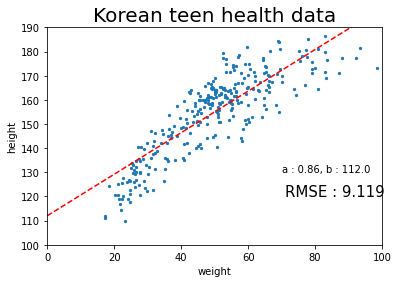

In [9]:
x = np.linspace(0, 100, 1001)
y = height_pred(x, a, b)

# df = pd.concat([weight_100, height_100], axis = 1)

# df["예상 키"] = height_pred(df['몸무게'], a, b)
# diff = df['키'] - df['예상 키']
# RMSE = np.sqrt(sum(diff**2)/len(diff))

plt.scatter(weight_data, height_data, s = 5)
plt.plot(x, y, 'r--')

plt.title("Korean teen health data", fontsize = 20)
plt.xlabel("weight")
plt.ylabel("height")
plt.text(70, 130, "a : {}, b : {}".format(a, b))
plt.text(71, 120, "RMSE : {:1.3f}".format(RMSE), fontsize = 15)

plt.xlim([0,100])
plt.ylim([100, 190])
plt.show()

In [10]:
# loss function 만들기 

# p-norm
def p_norm(diff, p):
  return sum(abs(diff) ** p) ** (1/p)

# OD
def OD(diff, a):
  return sum(abs(diff) / np.sqrt(a**2 + 1))

# lof cosh
def log_cosh(diff):
  return sum(np.log(np.cosh(diff)))

def huber(diff, delta):
  result = 0 

  for value in diff:
    if abs(value) < delta:
      result += (value ** 2) / 2
    else: 
      result += delta * (abs(value) - delta/2)

  return(result)

In [11]:
diff = np.array([3, 0, -2, 5, 3])

huber(diff, 10)

23.5

In [12]:
a_list = []
b_list = []
loss_list = []

df = pd.concat([weight_data, height_data], axis = 1)

for a in a_range:
  for b in b_range:
    df["예상 키"] = height_pred(df['몸무게'], a, b)
    diff = df['키'] - df['예상 키']
    # loss = p_norm(diff, 10)
    # loss = OD(diff, a)
    # loss = log_cosh(diff)
    loss = huber(diff, 20)

    a_list.append(a)
    b_list.append(b)
    loss_list.append(loss)


data_loss = pd.DataFrame([a_list, b_list, loss_list]).T
data_loss.columns = ['a', 'b', 'loss']
data_loss

data_min = data_loss[data_loss['loss'] == data_loss.min()[2]]

a = float(data_min['a'])
b = float(data_min['b'])
loss = float(data_min["loss"])

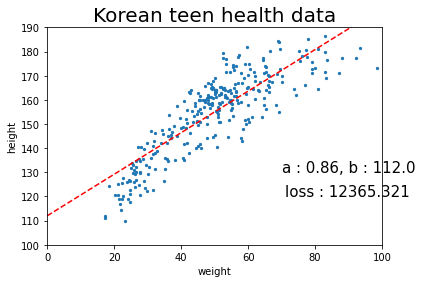

In [13]:
x = np.linspace(0, 100, 1001)
y = height_pred(x, a, b)

plt.scatter(weight_data, height_data, s = 5)
plt.plot(x, y, 'r--')

plt.title("Korean teen health data", fontsize = 20)
plt.xlabel("weight")
plt.ylabel("height")
plt.text(70, 130, "a : {}, b : {}".format(a, b), fontsize = 15)
plt.text(71, 120, "loss : {:1.3f}".format(loss), fontsize = 15)

plt.xlim([0,100])
plt.ylim([100, 190])
plt.show()

In [14]:
# 곡면을 그려보자! 
# (x,y) 점들의 집합이 필요하다!

a_test = range(1,4)
b_test = range(1,4)

# MeshGrid 만들기!

X, Y = np.meshgrid(a_test, b_test)

for x in range(len(a_test)):
  for y in range(len(b_test)):
    print("(x,y) = ({},{})".format(X[x,y], Y[x,y]))

(x,y) = (1,1)
(x,y) = (2,1)
(x,y) = (3,1)
(x,y) = (1,2)
(x,y) = (2,2)
(x,y) = (3,2)
(x,y) = (1,3)
(x,y) = (2,3)
(x,y) = (3,3)


In [15]:
# data의 loss는 2차원 데이터가 아니다!

data_loss['loss']

0       177859.74090
1       171876.15435
2       165899.80725
3       159934.47185
4       153983.04530
            ...     
1266     99277.74785
1267    104864.72265
1268    110538.43440
1269    116286.61495
1270    122094.59865
Name: loss, Length: 1271, dtype: float64

In [16]:
# 1차원 벡터를 2차원 array로 바꾸는 방법!

test = np.arange(9)
test

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [17]:
test.reshape(3,3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [18]:
loss_mat = np.array(loss_list).reshape(len(a_range), len(b_range))
loss_mat

array([[177859.7409  , 171876.15435 , 165899.80725 , ...,  13799.992   ,
         13459.16945 ,  13411.08145 ],
       [171893.529016, 165914.465608, 159945.459096, ...,  13216.59904 ,
         13167.840128,  13412.811288],
       [165932.898486, 159961.842812, 154004.827036, ...,  12957.003894,
         13201.894142,  13740.45617 ],
       ...,
       [ 39049.180048,  35863.992306,  32918.214622, ...,  99202.616044,
        104815.478014, 110511.215408],
       [ 36516.862096,  33570.440992,  30869.892416, ..., 104837.439272,
        110522.765464, 116279.956352],
       [ 34249.13015 ,  31545.59515 ,  29096.42235 , ..., 110538.4344  ,
        116286.61495 , 122094.59865 ]])

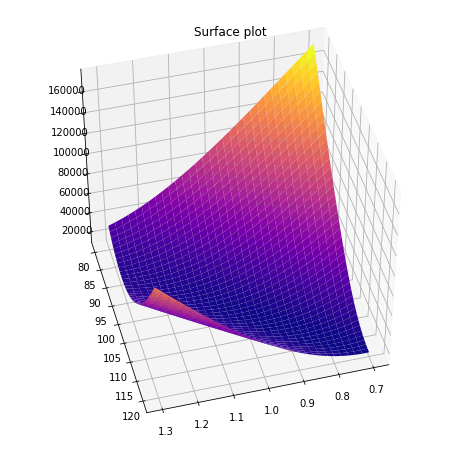

In [19]:
# 3차원 곡면 만들기

fig = plt.figure(figsize = (8,8))

ax3d = plt.axes(projection = '3d')

X, Y = np.meshgrid(a_range, b_range)
Z = np.array(loss_mat).T
ax3d.plot_surface(X, Y, Z, cmap = 'plasma')

ax3d.set_title("Surface plot")
ax3d.view_init(45, 75)

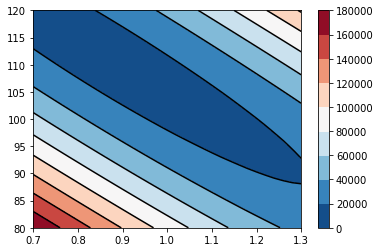

In [26]:
# 등고선 그리기

X, Y = np.meshgrid(a_range, b_range)
Z = np.array(loss_mat).T

plt.contour(X, Y, Z, levels = 10, colors = 'k')
cntr = plt.contourf(X, Y, Z, levels = 10, cmap = 'RdBu_r')
plt.colorbar(cntr)
plt.show()

In [21]:
# 일반적인 Linear Regression을 하는 함수 만들기! (Grid search method를 이용하는)

# input : X, Y, x_range, b_range, loss_function, loss_hyperparameter

# 1. loss_function을 이용하여 x,y 값에 따른 loss를 계산
# 2. 각 x, y, loss를 저장할 수 있는 DataFrame을 만들기.
# 3. loss가 가장 작게 나오는 parameter와 loss, loss_list를 출력한다.

def f(x,a,b):
  return a*x + b

def LR(X, Y, a_range, b_range, loss_function, loss_hyperparameter):

  a_list = []
  b_list = []
  loss_list = []

  for a in a_range:
    for b in b_range:
      diff = Y - f(X,a,b)

      if loss_function == "p_norm":
        loss = p_norm(diff, loss_hyperparameter)

      elif loss_function == "OD":
        loss = OD(diff, a)
      
      elif loss_function == "log_cosh":
        loss = log_cosh(diff)
      
      elif loss_function == "huber":
        loss = huber(diff, loss_hyperparameter)

      a_list.append(a)
      b_list.append(b)
      loss_list.append(loss)

  df_loss = pd.DataFrame([a_list, b_list, loss_list]).T
  df_loss.columns = ['a', 'b', 'loss']

  df_min = df_loss[df_loss['loss'] == df_loss.min()[2]]

  return float(df_min['a']), float(df_min['b']), float(df_min['loss']), loss_list


In [22]:
# 테스트 해보자!

np.random.seed(12)

n = 800
select = np.random.randint(1, data.shape[0], n)
height_data = data['키'][select]
weight_data = data['몸무게'][select]

a_range = np.linspace(0.7, 1.3, 31)
b_range = np.linspace(80,120, 41)

loss_function = "log_cosh"
p = 2


a, b, loss, loss_list = LR(X = weight_data, Y = height_data, 
                            a_range = a_range, b_range = b_range, 
                            loss_function = loss_function, loss_hyperparameter = p)

In [23]:
loss

5174.134795272789

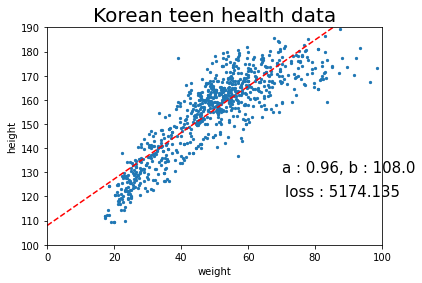

In [24]:
x = np.linspace(0, 100, 1001)
y = f(x, a, b)

plt.scatter(weight_data, height_data, s = 5)
plt.plot(x, y, 'r--')

plt.title("Korean teen health data", fontsize = 20)
plt.xlabel("weight")
plt.ylabel("height")
plt.text(70, 130, "a : {}, b : {}".format(a, b), fontsize = 15)
plt.text(71, 120, "loss : {:1.3f}".format(loss), fontsize = 15)

plt.xlim([0,100])
plt.ylim([100, 190])
plt.show()